Testing calc_path_segment_curved:
Vertical path length (should be 10 km): 10.000 km


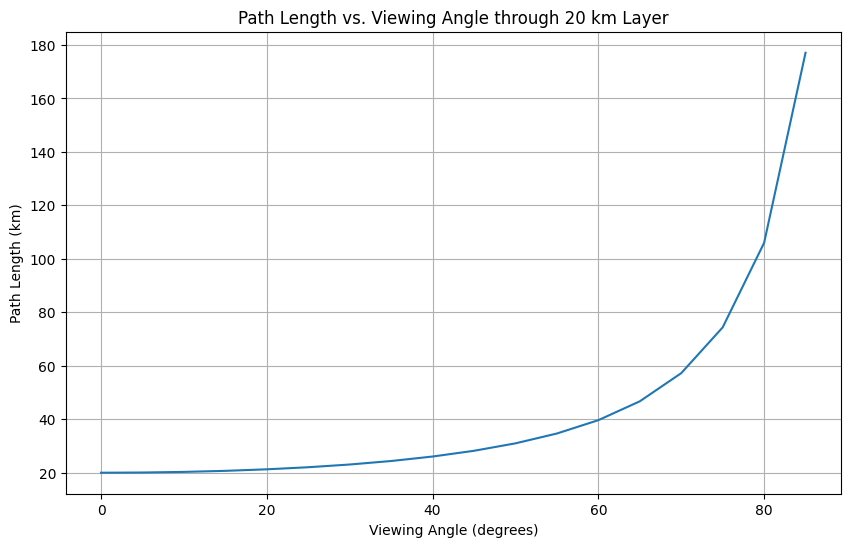


Testing integrate_opacity_nadir:

Vertical optical depth: 11.059


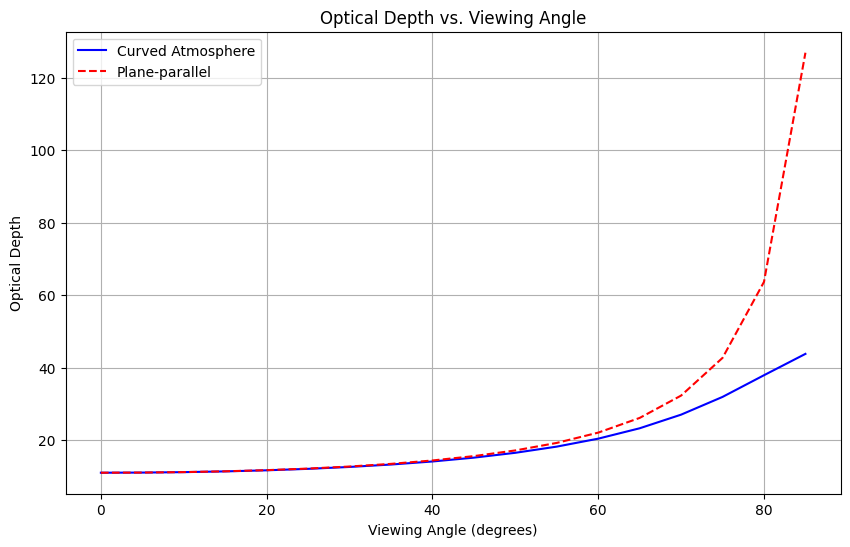


Testing cloud_thermal_brightness:


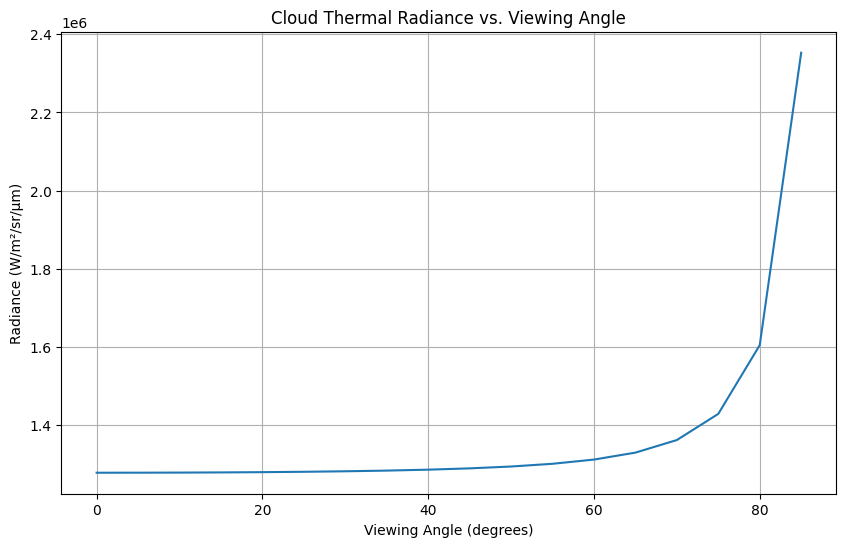


Nadir viewing components:
Surface emission: 1.269e+06 W/m²/sr/μm
Cloud emission: 6.575e+05 W/m²/sr/μm
Transmission: 0.741
Total radiance: 1.279e+06 W/m²/sr/μm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from radiative_transfer import calc_path_segment_curved, integrate_opacity_nadir, cloud_thermal_brightness

from radiation_fundamentals import RadiationFundamentals

# Initialize radiation class
rad = RadiationFundamentals()

# Planck function
planck_function = rad.planck_function

# Test 1: calc_path_segment_curved
def test_path_segment():
    planet_radius = 3390e3  # Mars radius in meters
    
    # Test 1.1: Simple vertical path
    path_length = calc_path_segment_curved(0, 10e3, 0, planet_radius)
    print(f"Vertical path length (should be 10 km): {path_length/1000:.3f} km")
    
    # Test 1.2: Path sequence at different angles
    z1 = 0  # surface
    z2 = 20e3  # 20 km altitude
    angles = np.linspace(0, 85, 18)  # degrees
    lengths = []
    
    for angle in angles:
        # Convert angle to impact parameter
        impact_param = planet_radius * np.sin(np.deg2rad(angle))
        length = calc_path_segment_curved(z1, z2, impact_param, planet_radius)
        lengths.append(length/1000)  # convert to km
    
    plt.figure(figsize=(10, 6))
    plt.plot(angles, lengths)
    plt.xlabel('Viewing Angle (degrees)')
    plt.ylabel('Path Length (km)')
    plt.title('Path Length vs. Viewing Angle through 20 km Layer')
    plt.grid(True)
    plt.show()

# Test 2: integrate_opacity_nadir
def test_opacity_nadir():
    planet_radius = 3390e3  # Mars radius
    scale_height = 11.1e3  # Mars atmospheric scale height
    
    # Create an exponential opacity profile
    altitude_grid = np.linspace(0, 100e3, 101)  # 0-100 km, 1 km steps
    opacity_profile = 0.01 * np.exp(-altitude_grid/scale_height)  # km^-1
    
    # Test 2.1: Vertical path
    tau_vertical = integrate_opacity_nadir(opacity_profile, altitude_grid, 
                                         0, 100e3, 0, planet_radius)
    print(f"\nVertical optical depth: {tau_vertical:.3f}")
    
    # Test 2.2: Path sequence at different angles
    angles = np.linspace(0, 85, 18)  # degrees
    taus = []
    
    for angle in angles:
        tau = integrate_opacity_nadir(opacity_profile, altitude_grid, 
                                    0, 100e3, np.deg2rad(angle), planet_radius)
        taus.append(tau)
    
    # Compare to plane-parallel approximation
    taus_pp = taus[0] / np.cos(np.deg2rad(angles))
    
    plt.figure(figsize=(10, 6))
    plt.plot(angles, taus, 'b-', label='Curved Atmosphere')
    plt.plot(angles, taus_pp, 'r--', label='Plane-parallel')
    plt.xlabel('Viewing Angle (degrees)')
    plt.ylabel('Optical Depth')
    plt.title('Optical Depth vs. Viewing Angle')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test 3: cloud_thermal_brightness
def test_thermal_cloud():
    
    # Test parameters
    surface_temp = 250  # K
    cloud_temp = 220   # K
    wavelength = 12e-6  # 12 μm
    optical_depth = 0.3
    single_scatter_albedo = 0.95
    cloud_altitude = 15e3  # 15 km
    planet_radius = 3390e3  # Mars
    
    # Test 3.1: Viewing angle sequence
    angles = np.linspace(0, 85, 18)  # degrees
    radiances = []
    
    for angle in angles:
        rad = cloud_thermal_brightness(surface_temp, wavelength, optical_depth,
                                     single_scatter_albedo, np.deg2rad(angle),
                                     cloud_temp, cloud_altitude, planet_radius)
        radiances.append(rad)
    
    plt.figure(figsize=(10, 6))
    plt.plot(angles, radiances)
    plt.xlabel('Viewing Angle (degrees)')
    plt.ylabel('Radiance (W/m²/sr/μm)')
    plt.title('Cloud Thermal Radiance vs. Viewing Angle')
    plt.grid(True)
    plt.show()
    
    # Test 3.2: Components at nadir
    rad_nadir = cloud_thermal_brightness(surface_temp, wavelength, optical_depth,
                                       single_scatter_albedo, 0,
                                       cloud_temp, cloud_altitude, planet_radius)
    
    # Calculate individual components
    surf_rad = planck_function(wavelength, surface_temp)
    cloud_rad = planck_function(wavelength, cloud_temp)
    trans = np.exp(-optical_depth)
    
    print("\nNadir viewing components:")
    print(f"Surface emission: {surf_rad:.3e} W/m²/sr/μm")
    print(f"Cloud emission: {cloud_rad:.3e} W/m²/sr/μm")
    print(f"Transmission: {trans:.3f}")
    print(f"Total radiance: {rad_nadir:.3e} W/m²/sr/μm")

if __name__ == "__main__":
    print("Testing calc_path_segment_curved:")
    test_path_segment()
    
    print("\nTesting integrate_opacity_nadir:")
    test_opacity_nadir()
    
    print("\nTesting cloud_thermal_brightness:")
    test_thermal_cloud()